In [233]:
import nfl_data_py as nfl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import ydata_profiling
#import gcsfs
from lifelines import KaplanMeierFitter
from time import time

import warnings
warnings.filterwarnings('ignore')

playlist_data = pd.read_csv("../Super_Grp_1_Proj_3/InjuryData/PlayList.csv")
injury_data = pd.read_csv("../Super_Grp_1_Proj_3/InjuryData/InjuryRecord.csv")

# due to massive size i've stored this file via Google Cloud

# fs = gcsfs.GCSFileSystem(project='My First Project')
# fs_bucket = fs.ls('nfl_player_tracker_data_bucket')
# with fs.open('nfl_player_tracker_data_bucket/PlayerTrackData.csv', 'rb') as f:
        #print(f.read())


# tracking_data = pd.read_csv("gs://nfl_player_tracker_data_bucket/nfl-playing-surface-analytics/PlayerTrackData.csv",
    # storage_options={"token": "anon"},nrows=int(1e6))

In [205]:
# pull data the nfl.import_injuries
years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
sample_size = 10
injuries = nfl.import_injuries(years)
injuries.sample(sample_size)



,season,game_type,team,week,gsis_id,position,full_name,first_name,last_name,report_primary_injury,report_secondary_injury,report_status,practice_primary_injury,practice_secondary_injury,practice_status,date_modified
3424,2010.0,REG,PIT,14.0,00-0000045,T,Flozell Adams,Flozell,Adams,Ankle,None,Probable,Ankle,None,Full Participation in Practice,2010-12-10 10:19:54+00:00
4961,2021.0,REG,PIT,17.0,00-0022924,QB,Ben Roethlisberger,Ben,Roethlisberger,None,None,None,Pectoral,right Shoulder,Full Participation in Practice,2022-01-01 19:29:05+00:00
153,2018.0,REG,SEA,1.0,00-0033554,S,Tedric Thompson,Tedric,Thompson,None,None,None,Rib,None,Full Participation in Practice,2018-09-06 16:12:55+00:00
4497,2021.0,REG,DEN,16.0,00-0036423,TE,Albert Okwuegbunam,Albert,Okwuegbunam,None,None,None,Knee,None,Full Participation in Practice,2021-12-24 20:42:59+00:00
1626,2012.0,REG,BUF,7.0,00-0022008,CB,Terrence McGee,Terrence,McGee,Knee,None,Questionable,Knee,None,Limited Participation in Practice,2012-10-19 09:29:35+00:00
2712,2020.0,REG,DET,10.0,00-0031130,LB,Christian Jones,Christian,Jones,None,None,None,Knee,None,Full Participation in Practice,2020-11-13 12:18:57+00:00
2851,2010.0,REG,SD,12.0,00-0027052,G,Louis Vasquez,Louis,Vasquez,Neck,None,Questionable,Neck,None,Did Not Participate In Practice,2010-11-26 14:23:01+00:00
3264,2011.0,REG,CIN,13.0,00-0020495,CB,Nate Clements,Nate,Clements,Hamstring,None,Questionable,Hamstring,None,Did Not Participate In Practice,2011-12-02 11:06:29+00:00
746,2015.0,REG,CAR,4.0,00-0022811,WR,Jerricho Cotchery,Jerricho,Cotchery,Ankle,None,Out,Ankle,None,Did Not Participate In Practice,2015-10-02 11:07:52+00:00
1288,2014.0,REG,PIT,5.0,00-0028001,T,Marcus Gilbert,Marcus,Gilbert,Ankle,None,Probable,Ankle,None,Full Participation in Practice,2014-10-03 10:19:43+00:00


In [163]:
# export data to csv
injuries_data_export = injuries.to_csv("InjuryData/injury_data.csv", index=False, encoding="utf-8")

# Test the CSV Data

In [206]:
playlist_data.head()

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,1,QB,QB
1,26624,26624-1,26624-1-2,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,2,QB,QB
2,26624,26624-1,26624-1-3,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,3,QB,QB
3,26624,26624-1,26624-1-4,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,4,QB,QB
4,26624,26624-1,26624-1-5,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,5,QB,QB


In [207]:
injury_data.head()

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1


In [166]:
# tracking_data.head()

# Synthetic vs Natural grass field types 

In [208]:
natural_field_grass = injury_data[injury_data.Surface == 'Natural']
turf_field_grass = injury_data[injury_data.Surface == 'Synthetic']

In [209]:
natural_field_grass.head()

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0
5,41145,41145-2,41145-2-60,Knee,Natural,1,0,0,0
7,44860,44860-5,44860-5-52,Knee,Natural,1,1,0,0
11,36621,36621-13,36621-13-58,Foot,Natural,1,1,1,1


In [210]:
turf_field_grass.head()

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1
6,46014,46014-10,46014-10-22,Ankle,Synthetic,1,1,1,1
8,44806,44806-7,44806-7-61,Knee,Synthetic,1,0,0,0


# Cleaning Up Data

In [211]:
# Merge both natural_field_grass and turf_field_grass with the PlayList DataTable 
# Then merge the PlayList and Injury tables together

nat_grass_type = pd.merge(natural_field_grass, playlist_data, on=['PlayerKey', 'GameID', 'PlayKey'], how='left')
turf_grass_type = pd.merge(turf_field_grass, playlist_data, on=['PlayerKey', 'GameID', 'PlayKey'], how='left')
injury_playlist_merge = pd.merge(injury_data, playlist_data, on=['PlayerKey', 'GameID', 'PlayKey'], how='left')

#NOTE: Will be using a pd.get_dummies to convert categorical variable into dummy/indicator variables. 
# I.E. changing from 'BodyPart' category field column to 'part' and 'RosterPosition' to 'pos'

inj_play_concat = pd.concat([injury_playlist_merge, 
                            pd.get_dummies(injury_playlist_merge['BodyPart'], prefix='part'),
                             pd.get_dummies(injury_playlist_merge['RosterPosition'],prefix='pos')], axis=1)


In [212]:
injury_playlist_merge.sample(sample_size)

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
89,46316,46316-5,46316-5-4,Ankle,Natural,1,1,0,0,Defensive Lineman,334.0,5.0,Outdoor,Natural,75.0,Clear,Rush,4.0,DE,DL
14,41094,41094-1,41094-1-55,Knee,Natural,1,1,1,1,Safety,1.0,1.0,Outdoors,Natural,72.0,Sunny,Pass,55.0,SS,DB
104,36696,36696-24,NaN,Knee,Synthetic,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,36591,36591-9,NaN,Knee,Natural,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,47220,47220-4,47220-4-16,Knee,Synthetic,1,1,0,0,Running Back,29.0,4.0,Outdoor,Synthetic,55.0,"Cloudy, 50% change of rain",Pass,16.0,RB,RB
65,46038,46038-30,46038-30-58,Ankle,Natural,1,1,0,0,Safety,463.0,30.0,Outdoor,Natural,45.0,Fair,Pass,58.0,FS,DB
86,47307,47307-10,47307-10-18,Knee,Synthetic,1,1,0,0,Cornerback,74.0,10.0,Dome,Synthetic,68.0,Indoors,Pass,18.0,CB,DB
97,45975,45975-23,NaN,Toes,Natural,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0,Linebacker,50.0,7.0,Open,Natural,76.0,Partly Cloudy,Punt,26.0,OLB,LB
43,39850,39850-9,39850-9-2,Knee,Synthetic,1,1,1,1,Safety,64.0,9.0,Outdoor,Synthetic,47.0,Partly Cloudy,Punt,2.0,SS,DB


In [213]:
inj_play_concat.sample(sample_size)


,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42,RosterPosition,...,part_Knee,part_Toes,pos_Cornerback,pos_Defensive Lineman,pos_Linebacker,pos_Offensive Lineman,pos_Running Back,pos_Safety,pos_Tight End,pos_Wide Receiver
37,44449,44449-6,44449-6-13,Knee,Natural,1,0,0,0,Wide Receiver,...,True,False,False,False,False,False,False,False,False,True
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0,Linebacker,...,True,False,False,False,True,False,False,False,False,False
10,46331,46331-4,46331-4-44,Ankle,Synthetic,1,1,1,1,Safety,...,False,False,False,False,False,False,False,True,False,False
18,46119,46119-3,46119-3-16,Knee,Natural,1,1,0,0,Linebacker,...,True,False,False,False,True,False,False,False,False,False
86,47307,47307-10,47307-10-18,Knee,Synthetic,1,1,0,0,Cornerback,...,True,False,True,False,False,False,False,False,False,False
53,43119,43119-12,NaN,Ankle,Synthetic,1,0,0,0,NaN,...,False,False,False,False,False,False,False,False,False,False
65,46038,46038-30,46038-30-58,Ankle,Natural,1,1,0,0,Safety,...,False,False,False,False,False,False,False,True,False,False
12,44492,44492-3,44492-3-23,Ankle,Natural,1,1,1,1,Running Back,...,False,False,False,False,False,False,True,False,False,False
66,41113,41113-15,41113-15-63,Ankle,Natural,1,0,0,0,Linebacker,...,False,False,False,False,True,False,False,False,False,False
74,47813,47813-8,47813-8-19,Ankle,Synthetic,1,1,0,0,Cornerback,...,False,False,True,False,False,False,False,False,False,False


In [173]:
#getting value counts for DM_M1, DM_M7, DM_M28, and DM_M42 (Days missing since injury and length of days absense )
injury_data['DM_M1'].value_counts()

DM_M1
1    105
Name: count, dtype: int64

In [174]:
injury_data['DM_M7'].value_counts()

DM_M7
1    76
0    29
Name: count, dtype: int64

In [175]:
injury_data['DM_M28'].value_counts()

DM_M28
0    68
1    37
Name: count, dtype: int64

In [176]:
injury_data['DM_M42'].value_counts()

DM_M42
0    76
1    29
Name: count, dtype: int64

In [177]:
playlist_data['StadiumType'].value_counts()

StadiumType
Outdoor                   145032
Outdoors                   32956
Indoors                    22805
Dome                        9376
Retractable Roof            8914
Indoor                      6892
Open                        4124
Domed, closed               3076
Retr. Roof - Closed         2235
Retr. Roof-Closed           2015
Domed, open                 1779
Dome, closed                1059
Closed Dome                 1011
Domed                        985
Oudoor                       914
Domed, Open                  807
Ourdoor                      778
Outdoor Retr Roof-Open       601
Outddors                     595
Indoor, Roof Closed          547
Retr. Roof-Open              486
Retr. Roof - Open            486
Indoor, Open Roof            479
Bowl                         465
Retr. Roof Closed            414
Heinz Field                  389
Outdor                       356
Outside                      341
Cloudy                       178
Name: count, dtype: int64

In [178]:
playlist_data['Weather'].value_counts()

Weather
Cloudy                                                                              60705
Sunny                                                                               51728
Partly Cloudy                                                                       28463
Clear                                                                               25923
Mostly Cloudy                                                                       11176
                                                                                    ...  
30% Chance of Rain                                                                    354
Partly Clouidy                                                                        302
Coudy                                                                                 278
Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.      246
Party Cloudy                                                                          230
Na

In [214]:
# create an merge with playlist_data and injury_data on PlayerKey append new column called Injury
# invoking lambada to determine if the injury sustained originated from the following BodyPart Knee, Foot or Ankle
# if injury matches those three BodyParts, 1 would be append in the column as value, if else it'll apply an 0

merge_play_inj = pd.merge(playlist_data, injury_data, on='PlayerKey', how='left')
merge_play_inj["Injury"] = merge_play_inj['BodyPart'].apply(lambda x: 1 if x in ['Knee','Foot','Ankle']  else 0)

#Resort the columns
agg_merge_play_inj = merge_play_inj[['StadiumType','FieldType','Weather','Injury', 'PlayType', 'Position', 'PlayerDay', 'Temperature']]

# applying the same principles for weather conditions, stadium type and field type as the Injury creating an new column and set values 1 and 0 
agg_merge_play_inj['Weather'] = agg_merge_play_inj['Weather'].apply(lambda x: 1 if x in ['rain','Rain','Snow','snow'] else 0)
agg_merge_play_inj['StadiumType'] = agg_merge_play_inj['StadiumType'].apply(lambda x: 1 if x in ['Outdoor','Oudoor','Open','Ourdoor','Out','open'] else 0)
agg_merge_play_inj['FieldType'] = agg_merge_play_inj['FieldType'].apply(lambda x: 1 if x in ['Natural'] else 0)

#Next we're using pd.Categorical to create a code correspondes to values from the PlayType and Position (I.E. PlayType: "Passing" -->> code: 1)
agg_merge_play_inj.PlayType = pd.Categorical(agg_merge_play_inj.PlayType)
agg_merge_play_inj['PlayType_Code'] = agg_merge_play_inj.PlayType.cat.codes

agg_merge_play_inj.Position = pd.Categorical(agg_merge_play_inj.Position)
agg_merge_play_inj['Position_Code'] = agg_merge_play_inj.Position.cat.codes

# creating an multiplier column to calculate the weather effect for opened dome stadium types 
agg_merge_play_inj['Multiplier'] = agg_merge_play_inj['StadiumType'] * agg_merge_play_inj['Weather']

In [216]:
agg_merge_play_inj.sample(sample_size)

,StadiumType,FieldType,Weather,Injury,PlayType,Position,PlayerDay,Temperature,PlayType_Code,Position_Code,Multiplier
141893,1,1,0,0,Field Goal,C,371,92,2,0,0
227314,1,1,0,0,Pass,SS,407,55,6,19,0
79345,1,1,0,0,Pass,OLB,372,91,6,14,0
24526,1,1,0,0,Pass,DT,15,80,6,4,0
100476,0,1,0,1,Rush,SS,1,72,10,19,0
88715,0,0,0,1,Kickoff Not Returned,ILB,365,-999,4,8,0
166748,1,0,0,1,Pass,WR,473,43,6,22,0
156416,0,0,0,0,Rush,CB,463,46,10,1,0
126875,0,1,0,0,Rush,WR,-62,71,10,22,0
257483,1,0,0,1,Punt,OLB,106,35,7,14,0


# Injury Visualization Data

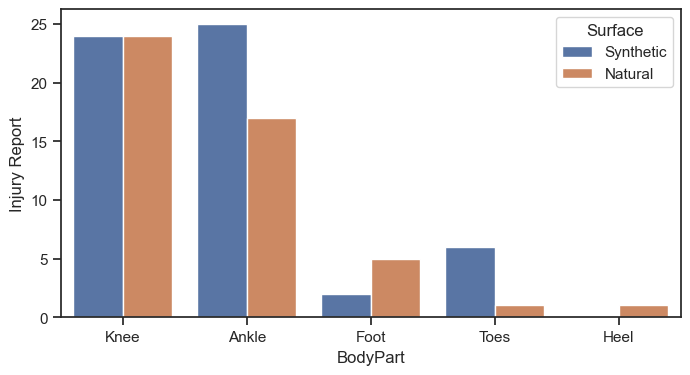

In [227]:
#creating injury chart for each body part based on Grass Type played on Synthetic (Turf) or Natural Grass
plt.figure(figsize=(8, 4))
plt_injury = sns.countplot(data=injury_playlist_merge, x='BodyPart', hue='Surface')
plt_injury.set(ylabel="Injury Report")
plt.show()

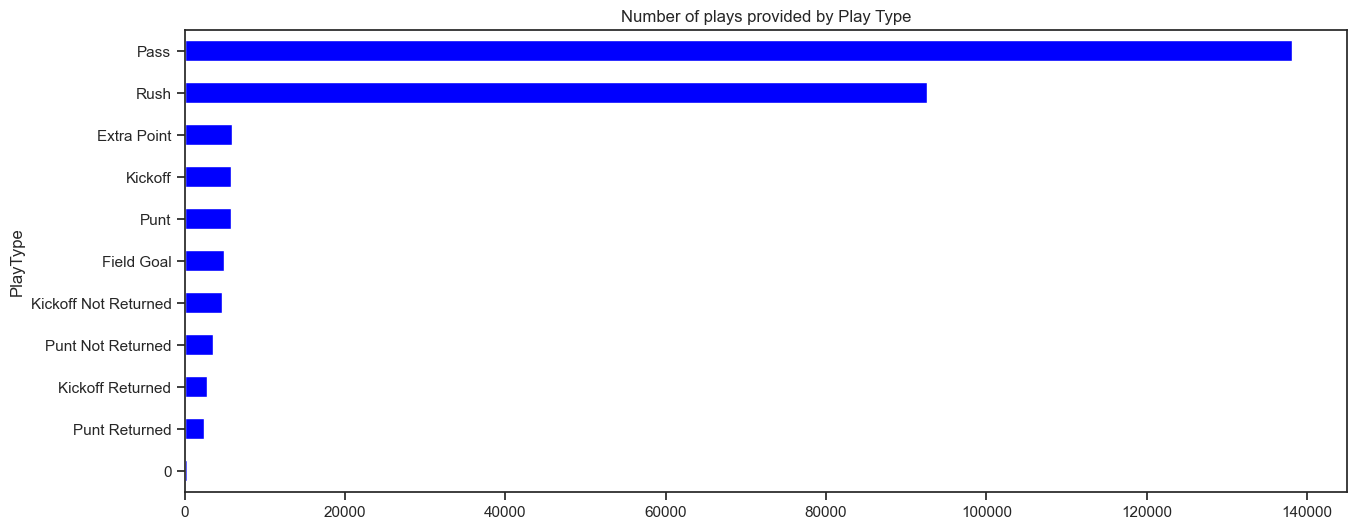

In [221]:
# Injury Report based on Roster Position
# plt.figure(figsize=(14,6))
# plt_injury = sns.countplot(data=injury_playlist_merge, x='RosterPosition', hue='Surface')
# plt_injury.set(ylabel="Injury Report")

playlist_data[['PlayKey', 'PlayType']].drop_duplicates()\
    .groupby('PlayType').count()['PlayKey']\
    .sort_values()\
    .plot(kind='barh',
         figsize=(15, 6),
          color='blue',
         title='Total Number of plays by Play Type')

plt.show()


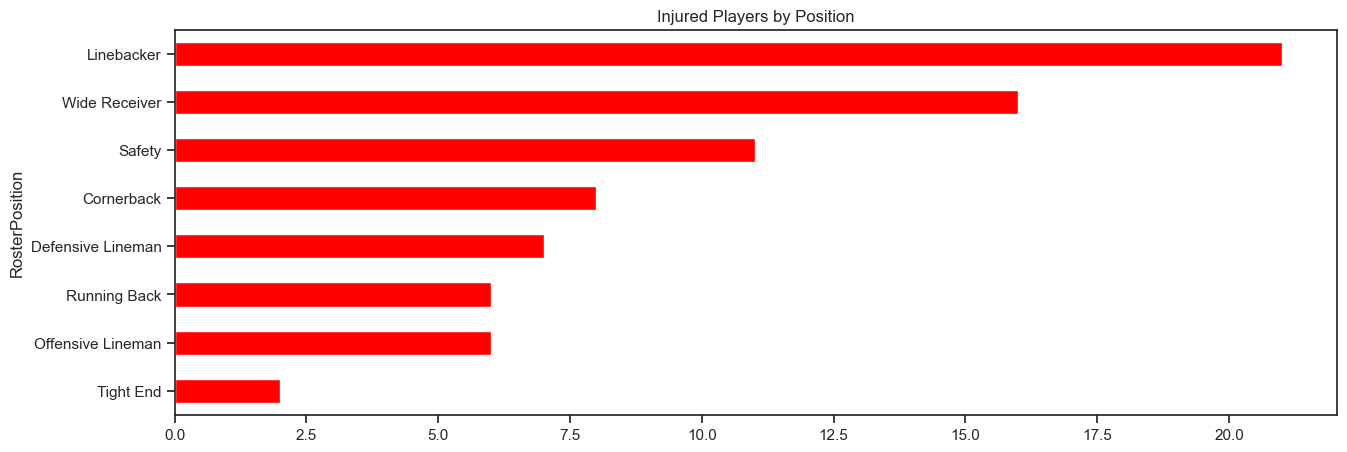

In [224]:
#Injury Report based on PlayType such as Running, Passing
# plt.figure(figsize=(14, 6))
# plt_injury = sns.countplot(data= injury_playlist_merge, x= 'PlayType', hue= 'Surface')
# plt_injury.set(ylabel="Injury Report")

injury_playlist_merge.groupby('RosterPosition').count()['PlayerKey']\
    .sort_values()\
    .plot(figsize=(15, 5), color='red',kind='barh', title='Injured Players by Position')
plt.show()

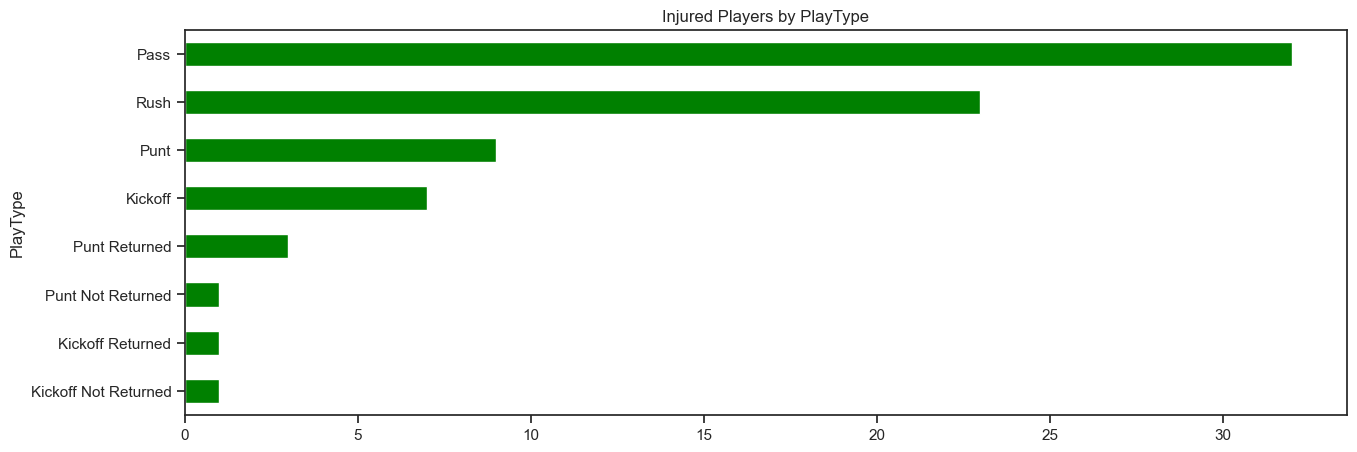

In [225]:
injury_playlist_merge.groupby('PlayType').count()['PlayerKey']\
    .sort_values()\
    .plot(figsize=(15, 5), color='green',kind='barh', title='Injured Players by PlayType')
plt.show()

## Distribution Charts

Creating a Distribution Charts to compare the Types of Injury associated with Player Position, Player Type and Turf Type

<Axes: title={'center': 'Injury Body Part by Player Position'}, ylabel='RosterPosition'>

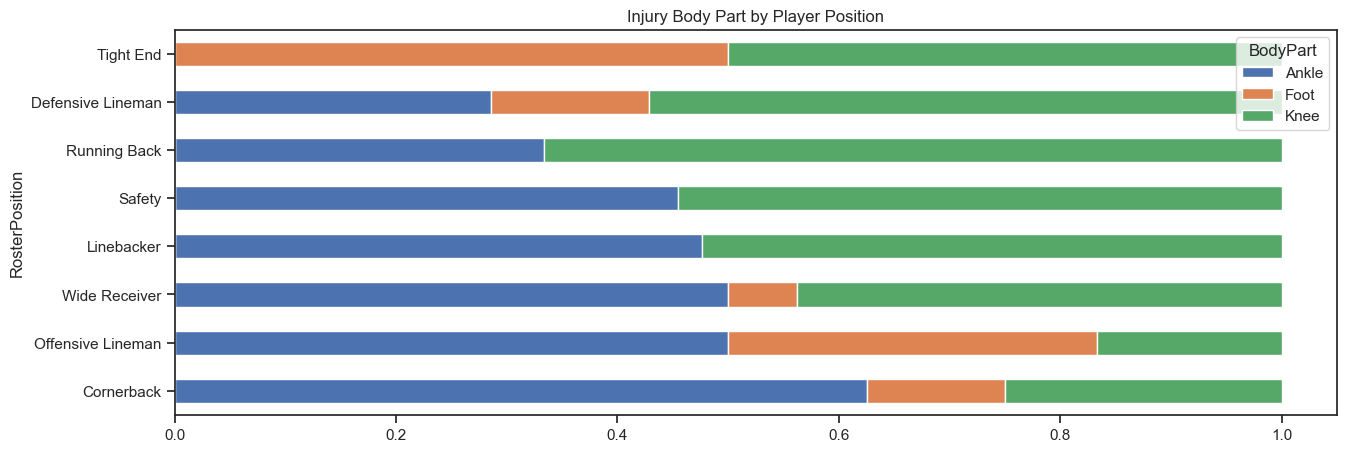

In [229]:
injury_playlist_merge.groupby(['RosterPosition', 'BodyPart']) \
    .count() \
    .unstack('BodyPart')['PlayerKey'] \
    .T.apply(lambda x: x/x.sum()) \
    .sort_values('BodyPart').T.sort_values('Ankle', ascending=False)\
    .plot(kind='barh',
          figsize=(15, 5),
          title='Injury Body Part by Player Position',
          stacked=True)
plt.show()

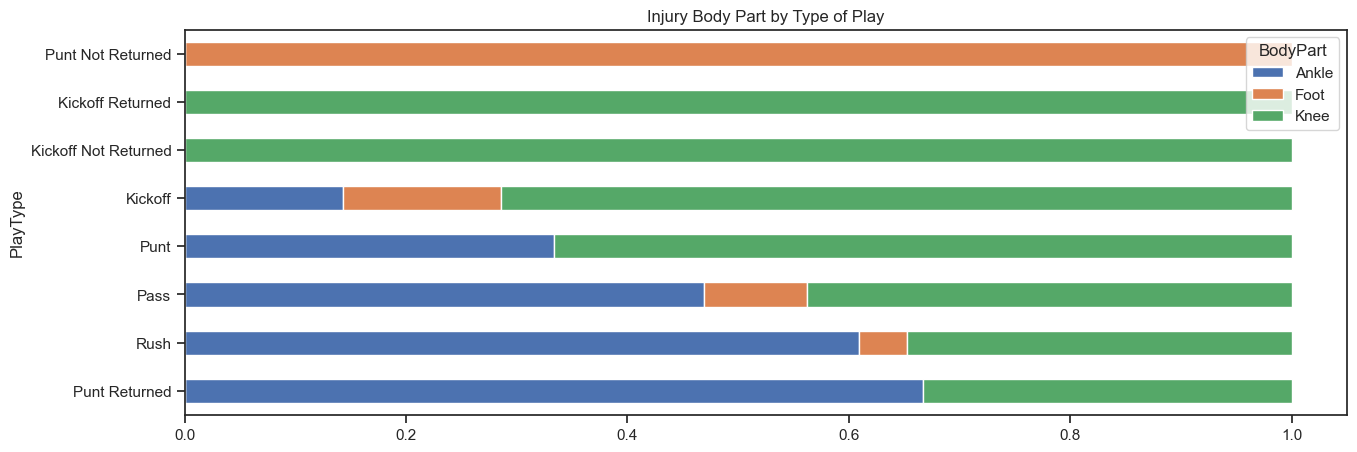

In [230]:
injury_playlist_merge.groupby(['PlayType', 'BodyPart']) \
    .count() \
    .unstack('BodyPart')['PlayerKey'] \
    .T.apply(lambda x: x/x.sum()) \
    .sort_values('BodyPart').T.sort_values('Ankle', ascending=False)\
    .plot(kind='barh',
          figsize=(15, 5),
          title='Injury Body Part by Type of Play',
          stacked=True)
plt.show()

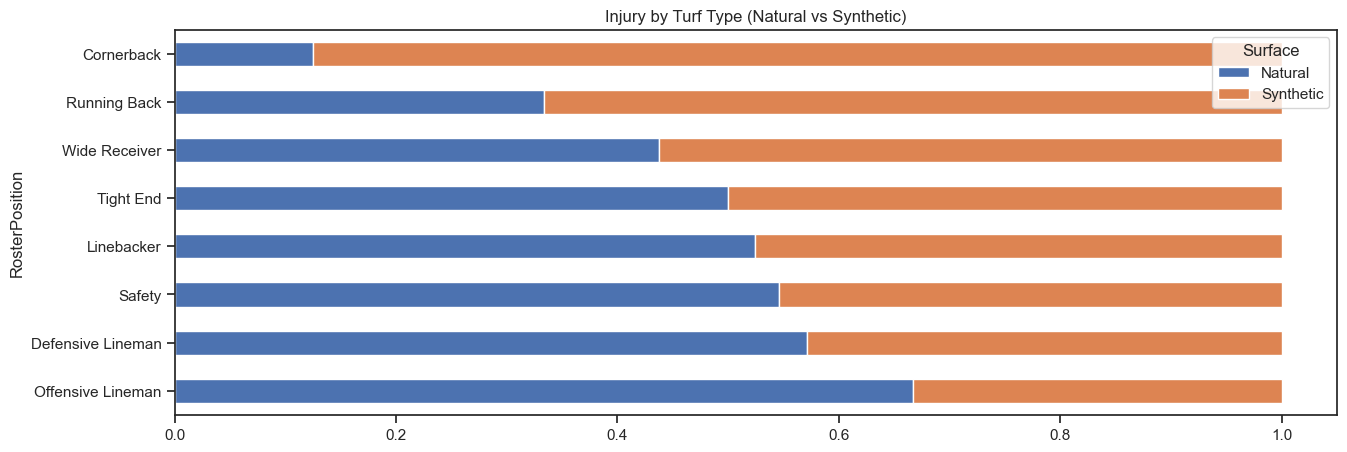

In [232]:
injury_playlist_merge.groupby(['RosterPosition', 'Surface']) \
    .count() \
    .unstack('Surface')['PlayerKey'] \
    .T.apply(lambda x: x/x.sum()) \
    .sort_values('Surface').T.sort_values('Natural', ascending=False)\
    .plot(kind='barh',
          figsize=(15, 5),
          title='Injury by Turf Type (Natural vs Synthetic)',
          stacked=True)
plt.show()

## Hazard Rate Model 

Model uses to determines the likelihood of an player subject to injury based on conditions (Turf Types, Open Stadium Type and Weather Conditions)


Models possibly be used in following: 

**Kaplan-Meier Estimate**

**Cox Proportional Hazard Model**

